# 🛍️ H&M Personalized Fashion Recommendations - EDA

Welcome to the exploratory data analysis and recommendation system notebook for the **H&M Personalized Fashion Recommendations** project. This notebook explores customer transaction behavior, article metadata, and customer demographics to derive actionable insights.

### Import and Loading the necessary libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Setup
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

### 1. Load the Dataset articles

In [ ]:
# Load the article dataset
articles_df = pd.read_csv('articles/articles.csv')

# Display shape and sample of the dataset
print(f"Shape: {articles_df.shape}")
articles_df.head()


Shape: (105542, 25)


,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


Articles data has 105542 rows and 25 columns

### 2. Basic Info and Missing values

In [4]:
# Overview of dataset
articles_df.info()

# Count missing values
missing_values = articles_df.isnull().sum().sort_values(ascending=False)
print("Missing values:\n", missing_values[missing_values > 0])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  int64 
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-null  int64 
 13 

There is no missing values apart from detail_dec column.

### 3. Understand Data Columns

In [4]:
# Unique values in each column
for col in articles_df.columns:
    print(f"{col}: {articles_df[col].nunique()} unique values")


article_id: 105542 unique values
product_code: 47224 unique values
prod_name: 45875 unique values
product_type_no: 132 unique values
product_type_name: 131 unique values
product_group_name: 19 unique values
graphical_appearance_no: 30 unique values
graphical_appearance_name: 30 unique values
colour_group_code: 50 unique values
colour_group_name: 50 unique values
perceived_colour_value_id: 8 unique values
perceived_colour_value_name: 8 unique values
perceived_colour_master_id: 20 unique values
perceived_colour_master_name: 20 unique values
department_no: 299 unique values
department_name: 250 unique values
index_code: 10 unique values
index_name: 10 unique values
index_group_no: 5 unique values
index_group_name: 5 unique values
section_no: 57 unique values
section_name: 56 unique values
garment_group_no: 21 unique values
garment_group_name: 21 unique values
detail_desc: 43404 unique values


### 4. Distributions plots

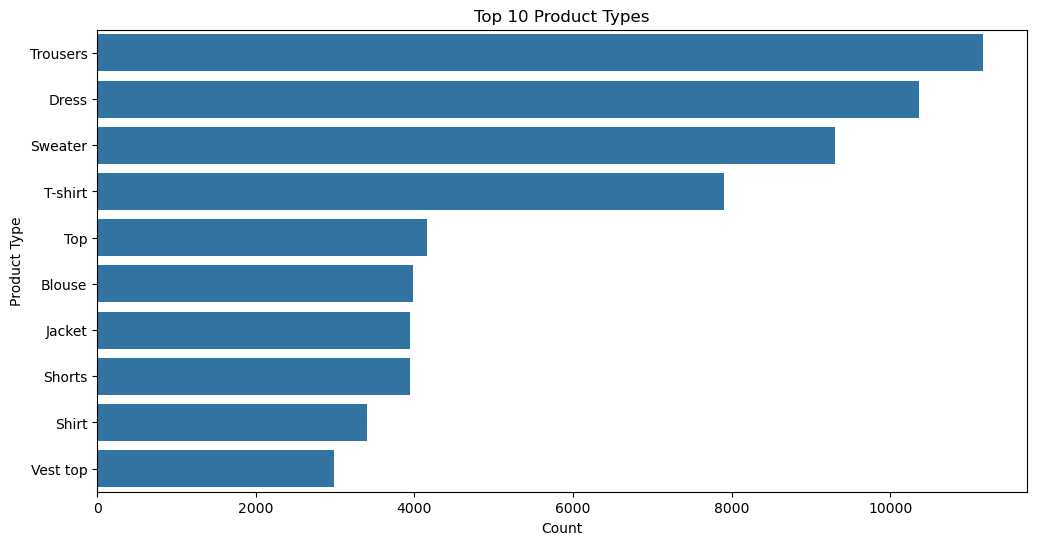

In [ ]:
### Top Product Types

plt.figure(figsize=(12,6))
sns.countplot(y=articles_df['product_type_name'], order=articles_df['product_type_name'].value_counts().head(10).index)
plt.title('Top 10 Product Types')
plt.xlabel('Count')
plt.ylabel('Product Type')
plt.show()


This plot shows the most frequently occurring product types sold by H&M.

Y-axis: Product Type Name

X-axis: Frequency (i.e., how many times each product type appears in articles.csv)

This plot helps you understand which product categories are most stocked or sold, which can feed into:

- Popularity-based recommendation models

- Inventory analysis

- Trend analysis by season 

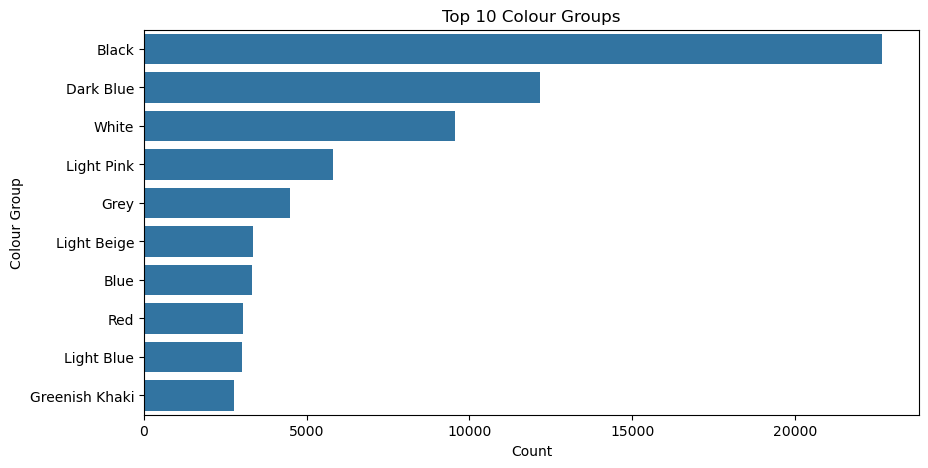

In [7]:
### Top Color Groups

plt.figure(figsize=(10,5))
sns.countplot(y=articles_df['colour_group_name'], order=articles_df['colour_group_name'].value_counts().head(10).index)
plt.title('Top 10 Colour Groups')
plt.xlabel('Count')
plt.ylabel('Colour Group')
plt.show()


This plot shows the most frequently occurring color groups in the product catalog.

- X-axis: Count (number of articles in that color group)

- Y-axis: colour_group_name

- Insights

This helps uncover customer preferences or product trends — e.g., if black, white, and pink dominate, H&M might double down on those in marketing or stocking.

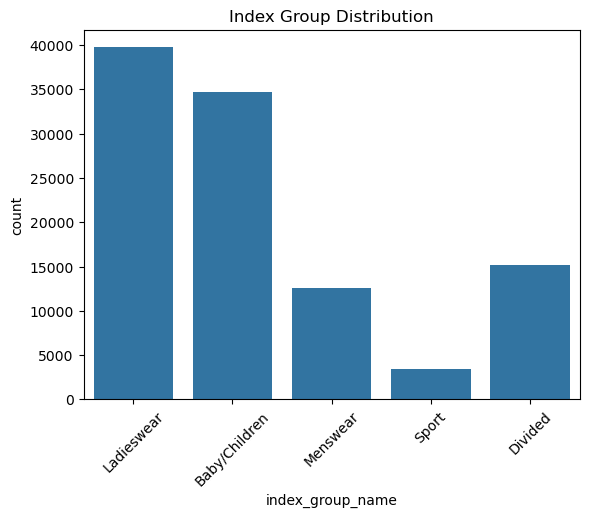

In [8]:
### Index Groups

sns.countplot(data=articles_df, x='index_group_name')
plt.xticks(rotation=45)
plt.title('Index Group Distribution')
plt.show()


index_group_name typically refers to broader categories like:

- Ladieswear
- Menswear
- Baby/Children
- Divided (a sub-brand)

- Insights

This plot tells you which index groups dominate the product catalog. For example, if "Ladieswear" has the most SKUs, it could explain why female customers have more interactions — useful for gender-segmented recommendations later on.

### 6. Categorical Cross-Analysis

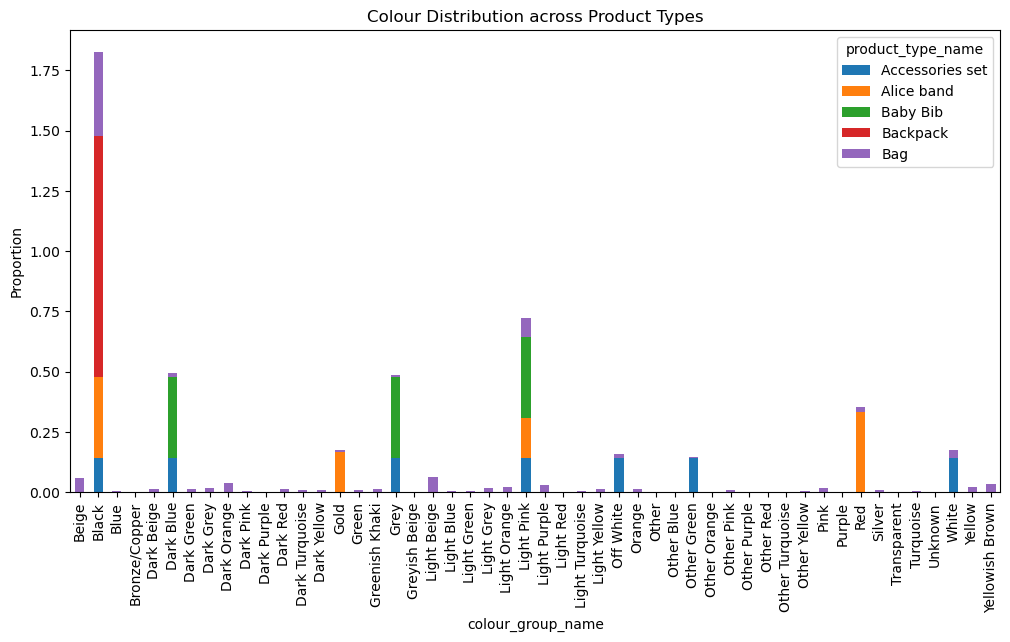

In [12]:
cross_tab = pd.crosstab(articles_df['product_type_name'], articles_df['colour_group_name'])
cross_tab_normalized = cross_tab.div(cross_tab.sum(axis=1), axis=0)

# Show top product types
cross_tab_normalized.head(5).T.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title("Colour Distribution across Product Types")
plt.ylabel("Proportion")
plt.show()


For each of the top 5 product types, it visualizes how the different color groups are distributed proportionally. This helps us identify:

- Which colors dominate which product types

- Whether certain products are color-diverse or color-biased

For example:

- Users buys backpack with black color. H&M can stock up black color backpack more.

- Dresses may have more variety and bright shades

### 1. Load the Dataset customers

In [5]:
# Load the dataset
customers_df = pd.read_csv('customers/customers.csv')

# Display shape and sample
print(f"Shape: {customers_df.shape}")
customers_df.head()

Shape: (1371980, 7)


,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


Customers data have 1371980 rows and 7 columns.

### 2. Basic info and Missing Values

In [7]:
# Overview of dataset
customers_df.info()

# Count missing values
missing_values = customers_df.isnull().sum().sort_values(ascending=False)
print("Missing values:\n", missing_values[missing_values > 0])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      476930 non-null   float64
 2   Active                  464404 non-null   float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355969 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 73.3+ MB
Missing values:
 Active                    907576
FN                        895050
fashion_news_frequency     16011
age                        15861
club_member_status          6062
dtype: int64


- FN and Active columns:
    - These are binary indicator fields (1.0 = yes, NaN = no).
    - More than 65% missing → likely safe to assume missing = 0.

- club_member_status, fashion_news_frequency, age:
    - Only ~1% missing → can either:
       - Drop those rows
       - Impute (e.g., using mode for categorical, median for age)

### 3. Understands data column

In [8]:
# Unique values in each column
for col in customers_df.columns:
    print(f"{col}: {customers_df[col].nunique()} unique values")

customer_id: 1371980 unique values
FN: 1 unique values
Active: 1 unique values
club_member_status: 3 unique values
fashion_news_frequency: 3 unique values
age: 84 unique values
postal_code: 352899 unique values


### Club Member Status Distribution

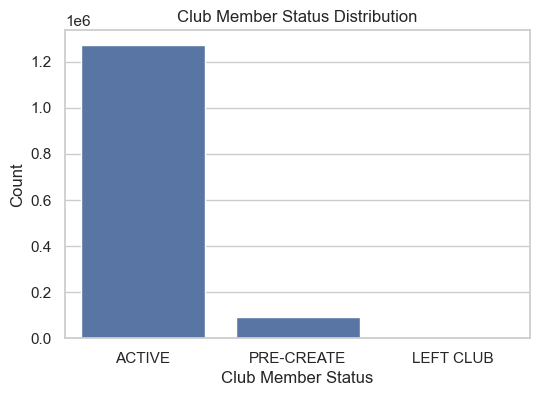

In [9]:
plt.figure(figsize=(6,4))
sns.countplot(data=customers_df, x='club_member_status', order=customers_df['club_member_status'].value_counts().index)
plt.title("Club Member Status Distribution")
plt.xlabel("Club Member Status")
plt.ylabel("Count")
plt.show()

- Common values usually are:
    - 'ACTIVE'
    - 'PRE-CREATE' (accounts created but not yet fully registered)
    - 'LEFT CLUB' (past members)

- It helps you understand the engagement level of customers based on their loyalty status:

    - If most are 'ACTIVE', your recommender model will have stronger behavior signals.
    - If many are 'PRE-CREATE', you might want to exclude them from modeling due to cold-start risk.
    - If 'LEFT CLUB' is significant, you could analyze churn trends.

### Fashion News Frequency

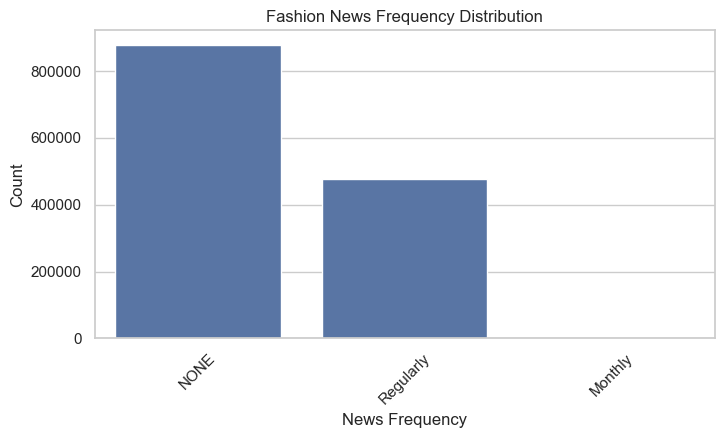

In [10]:
plt.figure(figsize=(8,4))
sns.countplot(data=customers_df, x='fashion_news_frequency', order=customers_df['fashion_news_frequency'].value_counts().index)
plt.title("Fashion News Frequency Distribution")
plt.xlabel("News Frequency")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

- Plots a bar chart showing how frequently customers receive H&M’s fashion news (email/notifications).

- This feature can indicate a customer's interest level or marketing engagement:

    - 'Regularly': Highly engaged
    - 'Monthly': Less engaged
    - 'NONE', 'None', 'NA': Not interested (possible churn candidates or cold-start users)

- Insight for Recommendations:
    - High-frequency readers are better candidates for new arrivals, promotions, or trend-based recommenders.
    - Non-subscribers may need behavior-based models or basic popularity recommenders.

### Age Distribution

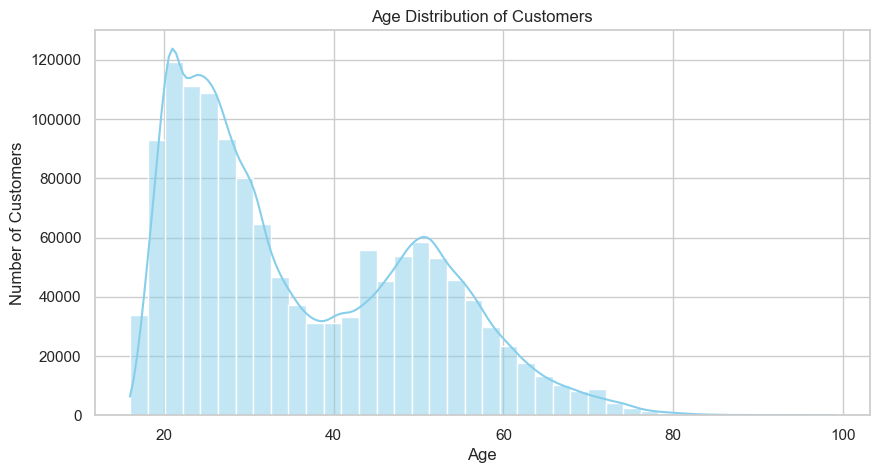

In [15]:
plt.figure(figsize=(10,5))
sns.histplot(customers_df['age'].dropna(), bins=40, kde=True, color='skyblue')
plt.title("Age Distribution of Customers")
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.show()

### Boxplot: Age vs Club Member Status

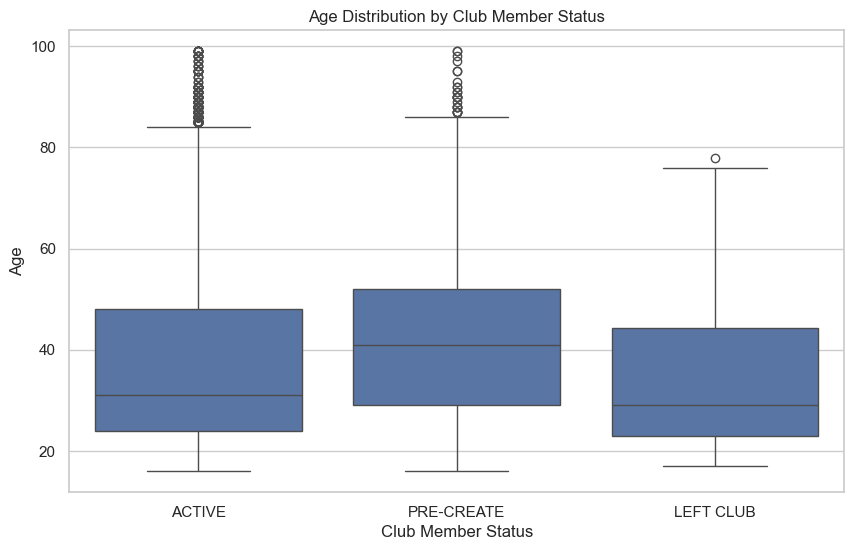

In [17]:
plt.figure(figsize=(10,6))
sns.boxplot(data=customers_df, x='club_member_status', y='age')
plt.title("Age Distribution by Club Member Status")
plt.xlabel("Club Member Status")
plt.ylabel("Age")
plt.show()

### Grouped Status

In [18]:
print("\nAverage Age by Club Member Status:")
print(customers_df.groupby("club_member_status")["age"].mean())

print("\nFashion News Frequency by Club Member Status:")
print(customers_df.groupby("club_member_status")["fashion_news_frequency"].value_counts(normalize=True))


Average Age by Club Member Status:
club_member_status
ACTIVE        36.077991
LEFT CLUB     33.989224
PRE-CREATE    40.885313
Name: age, dtype: float64

Fashion News Frequency by Club Member Status:
club_member_status  fashion_news_frequency
ACTIVE              NONE                      0.625499
                    Regularly                 0.373883
                    Monthly                   0.000617
LEFT CLUB           NONE                      0.982869
                    Regularly                 0.017131
PRE-CREATE          NONE                      0.935695
                    Regularly                 0.063656
                    Monthly                   0.000649
Name: proportion, dtype: float64


### 1. Load the Dataset transactions

In [20]:
# Load the dataset
transactions_df = pd.read_csv('transactions_train/transactions_train.csv', parse_dates=['t_dat'])

# Display shape and sample
print(f"Shape: {transactions_df.shape}")
transactions_df.head()

Shape: (31788324, 5)


,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


### 2. Basic Info and Missing values

In [21]:
# Overview of dataset
transactions_df.info()

# Count missing values
missing_values = transactions_df.isnull().sum().sort_values(ascending=False)
print("Missing values:\n", missing_values[missing_values > 0])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype         
---  ------            -----         
 0   t_dat             datetime64[ns]
 1   customer_id       object        
 2   article_id        int64         
 3   price             float64       
 4   sales_channel_id  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 1.2+ GB
Missing values:
 Series([], dtype: int64)


### 3. Understand the data column

In [22]:
# Unique values in each column
for col in transactions_df.columns:
    print(f"{col}: {transactions_df[col].nunique()} unique values")

t_dat: 734 unique values
customer_id: 1362281 unique values
article_id: 104547 unique values
price: 9857 unique values
sales_channel_id: 2 unique values


### 4. Sales over time

In [ ]:
transactions_df['t_dat'] = pd.to_datetime(transactions_df['t_dat'])
transactions_df['week'] = transactions_df['t_dat'].dt.isocalendar().week
transactions_df['year'] = transactions_df['t_dat'].dt.year

In [24]:
transactions_df.head()

,t_dat,customer_id,article_id,price,sales_channel_id,week,year
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,38,2018
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2,38,2018
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2,38,2018
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2,38,2018
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2,38,2018


In [ ]:
weekly_sales = transactions_df.groupby(['year', 'week']).size().reset_index(name='transactions')

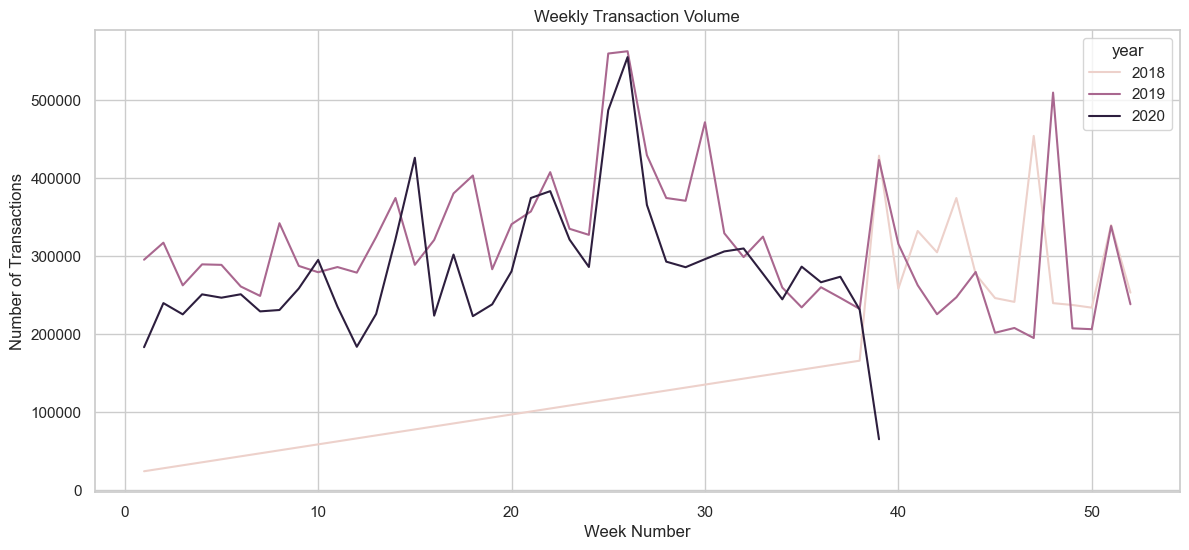

In [25]:
plt.figure(figsize=(14,6))
sns.lineplot(data=weekly_sales, x='week', y='transactions', hue='year')
plt.title("Weekly Transaction Volume")
plt.xlabel("Week Number")
plt.ylabel("Number of Transactions")
plt.show()

### 5. Price Distribution

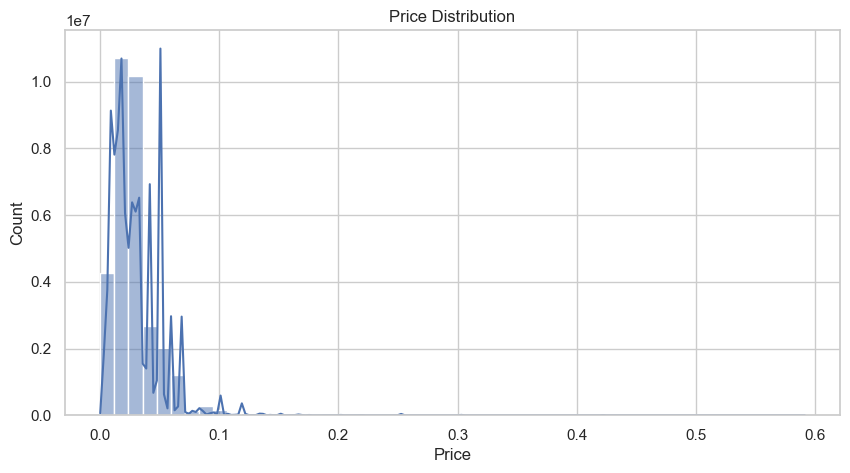

In [27]:
plt.figure(figsize=(10,5))
sns.histplot(transactions_df['price'], bins=50, kde=True)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

### 6. Sales channel distribution

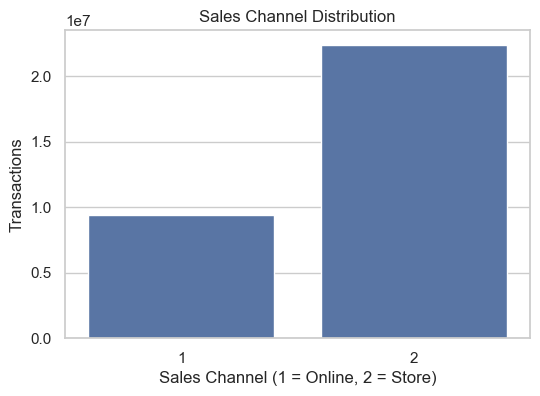

In [28]:
plt.figure(figsize=(6,4))
sns.countplot(data=transactions_df, x='sales_channel_id')
plt.title("Sales Channel Distribution")
plt.xlabel("Sales Channel (1 = Online, 2 = Store)")
plt.ylabel("Transactions")
plt.show()

### Top 10 purchased articles

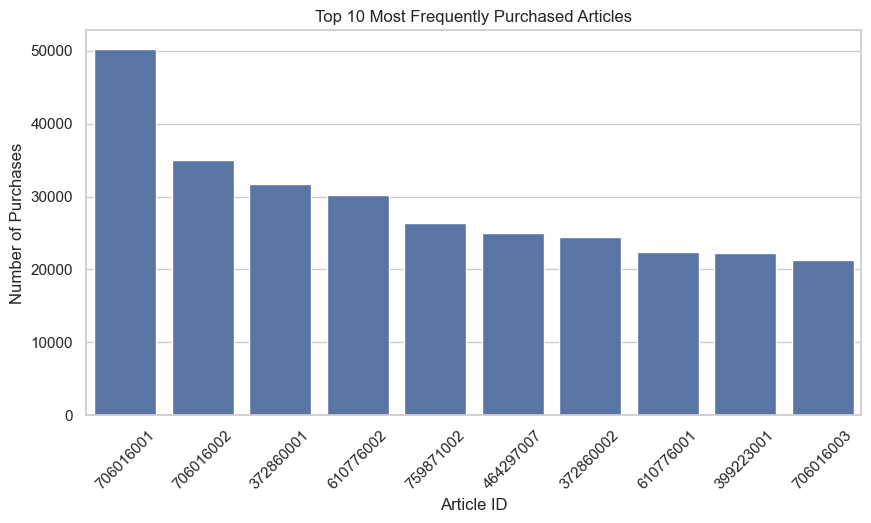

In [29]:
top_articles = transactions_df['article_id'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_articles.index.astype(str), y=top_articles.values)
plt.title("Top 10 Most Frequently Purchased Articles")
plt.xlabel("Article ID")
plt.ylabel("Number of Purchases")
plt.xticks(rotation=45)
plt.show()

### Top 10 most active customers

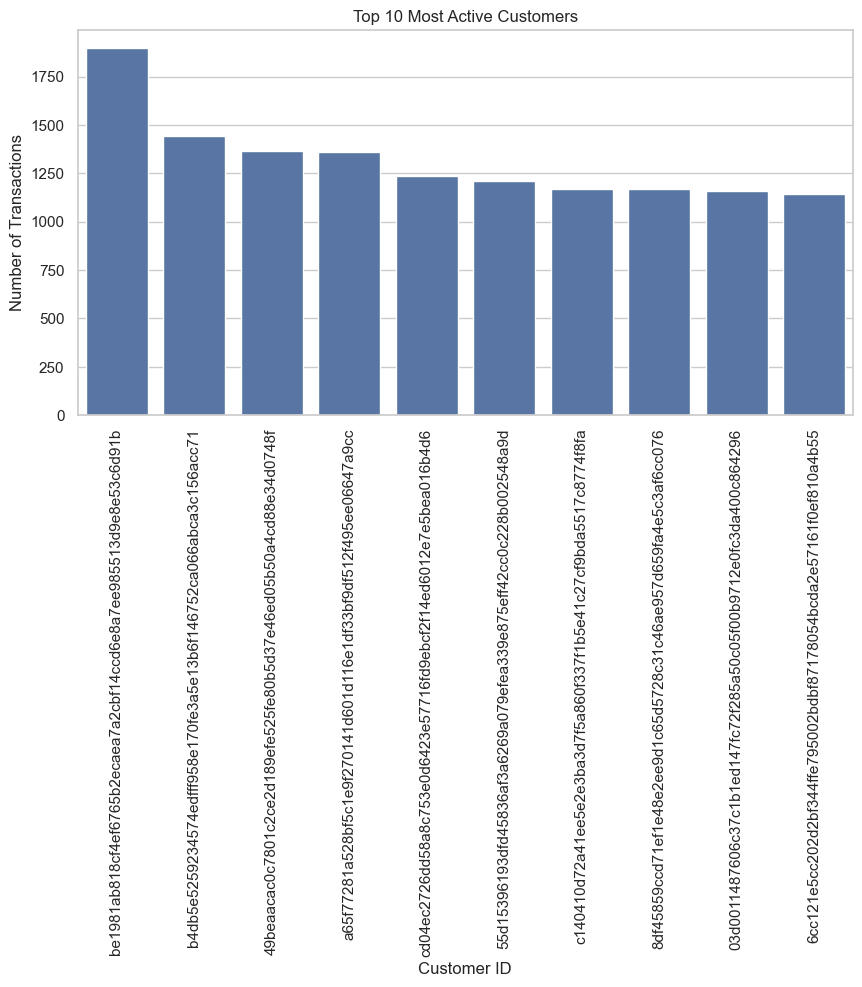

In [31]:
top_customers = transactions_df['customer_id'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_customers.index, y=top_customers.values)
plt.title("Top 10 Most Active Customers")
plt.xlabel("Customer ID")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=90)
plt.show()

### Average price per article

In [33]:
avg_price_per_article = transactions_df.groupby('article_id')['price'].mean().sort_values(ascending=False).head(10)
print("\nTop 10 Most Expensive Articles (Avg Price):")
print(avg_price_per_article)


Top 10 Most Expensive Articles (Avg Price):
article_id
860884001    0.506780
776442001    0.506780
613539001    0.506780
916300001    0.506081
916300002    0.501021
839478002    0.491999
839478001    0.491568
713219001    0.471904
810872001    0.463068
820023001    0.456102
Name: price, dtype: float64


### 1. Merge all dataset

In [34]:
# Merge transactions with articles
tx_articles = transactions_df.merge(articles_df, on='article_id', how='left')

# Merge with customers
full_df = tx_articles.merge(customers_df, on='customer_id', how='left')

full_df.head()


,t_dat,customer_id,article_id,price,sales_channel_id,week,year,product_code,prod_name,product_type_no,...,section_name,garment_group_no,garment_group_name,detail_desc,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,38,2018,663713,Atlanta Push Body Harlow,283,...,Womens Lingerie,1017,"Under-, Nightwear","Lace push-up body with underwired, moulded, pa...",NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2,38,2018,541518,Rae Push (Melbourne) 2p,306,...,Womens Lingerie,1017,"Under-, Nightwear","Lace push-up bras with underwired, moulded, pa...",NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2,38,2018,505221,Inca Jumper,252,...,Divided Selected,1003,Knitwear,Jumper in rib-knit cotton with hard-worn detai...,1.0,1.0,ACTIVE,Regularly,32.0,8d6f45050876d059c830a0fe63f1a4c022de279bb68ce3...
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2,38,2018,685687,W YODA KNIT OL OFFER,252,...,Womens Everyday Collection,1023,Special Offers,V-neck knitted jumper with long sleeves and ri...,1.0,1.0,ACTIVE,Regularly,32.0,8d6f45050876d059c830a0fe63f1a4c022de279bb68ce3...
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2,38,2018,685687,W YODA KNIT OL OFFER,252,...,Womens Everyday Collection,1023,Special Offers,V-neck knitted jumper with long sleeves and ri...,1.0,1.0,ACTIVE,Regularly,32.0,8d6f45050876d059c830a0fe63f1a4c022de279bb68ce3...


### 2. Most Purchased Product Categories by Age Group

C:\Users\sandeep.palit\AppData\Local\Temp\ipykernel_25704\3937103585.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_by_age = full_df.groupby(['age_group', 'product_group_name']).size().unstack().fillna(0)


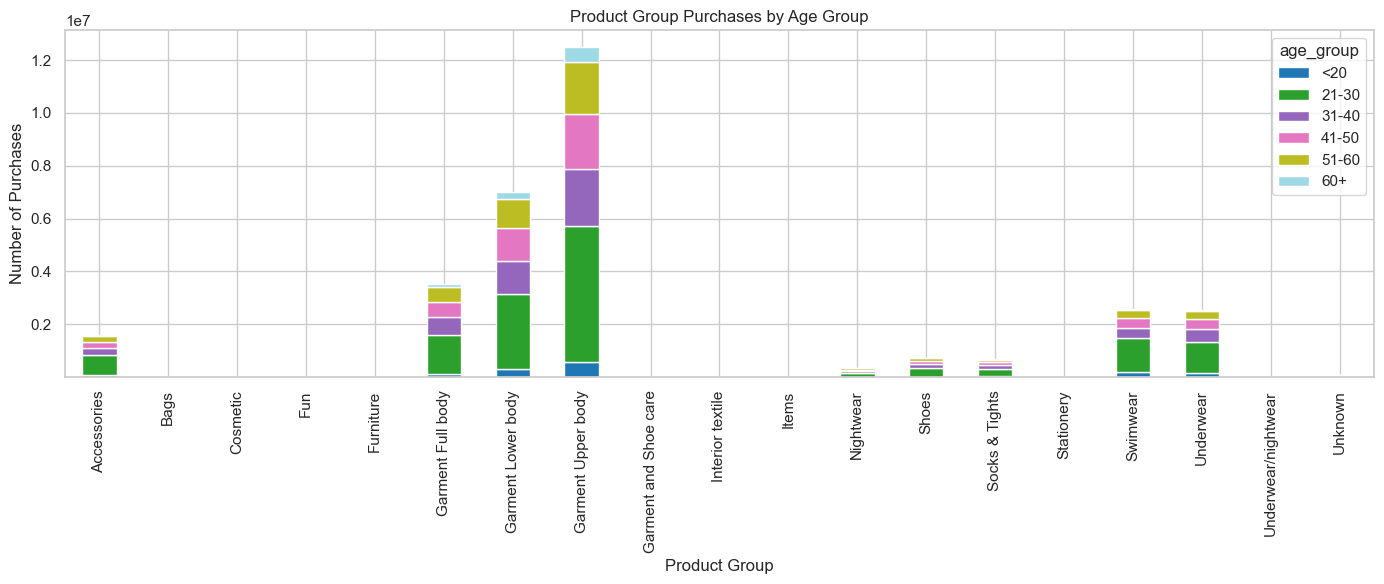

In [35]:
# Create age bins
full_df['age_group'] = pd.cut(full_df['age'], bins=[0, 20, 30, 40, 50, 60, 100], 
                              labels=['<20', '21-30', '31-40', '41-50', '51-60', '60+'])

# Group and count
category_by_age = full_df.groupby(['age_group', 'product_group_name']).size().unstack().fillna(0)

# Visualize
category_by_age.T.plot(kind='bar', stacked=True, figsize=(14,6), colormap='tab20')
plt.title("Product Group Purchases by Age Group")
plt.ylabel("Number of Purchases")
plt.xlabel("Product Group")
plt.tight_layout()
plt.show()

### 3. Average Spending per Custome

In [37]:
avg_spending = full_df.groupby('customer_id')['price'].sum().sort_values(ascending=False)
avg_spending

customer_id
be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee985513d9e8e53c6d91b    57.676407
a65f77281a528bf5c1e9f270141d601d116e1df33bf9df512f495ee06647a9cc    50.921186
03d0011487606c37c1b1ed147fc72f285a50c05f00b9712e0fc3da400c864296    49.967169
191071b0e1f2e94a557f1a0b4cea3de55faf1581b1f46466ffe90664f73ec96e    47.682017
b4db5e5259234574edfff958e170fe3a5e13b6f146752ca066abca3c156acc71    47.662000
                                                                      ...    
7ba686bcc845f1ea49b00e32c98cf6d9132fc29395a580e81bb4bf73b3affcdb     0.000847
8f06cf200f1fbc9c8a91ce6783a18ccae68463a46edabda52a6a2c1a20a160c5     0.000847
b36a2dac88d1f435dd1dae7eb406a6cbde18118709fef527a1ac4fc177c64be0     0.000847
6ca58871020638aa7a7341b8108bf94c6de9258dde91dc3a83b35af8c2539dc6     0.000847
a1c392de2f181fe9575721d44a6f115427e550e5feabd1a690ff1df27e79d15b     0.000763
Name: price, Length: 1362281, dtype: float64

### 4. Repeat Purchase Rate

In [39]:
repeat_buyers = full_df.groupby('customer_id')['article_id'].nunique()
repeat_rate = (repeat_buyers > 1).sum() / repeat_buyers.count()
print(f"Repeat purchase rate: {repeat_rate:.2%}")

Repeat purchase rate: 88.63%


### 5. Time-Based Purchasing Trends

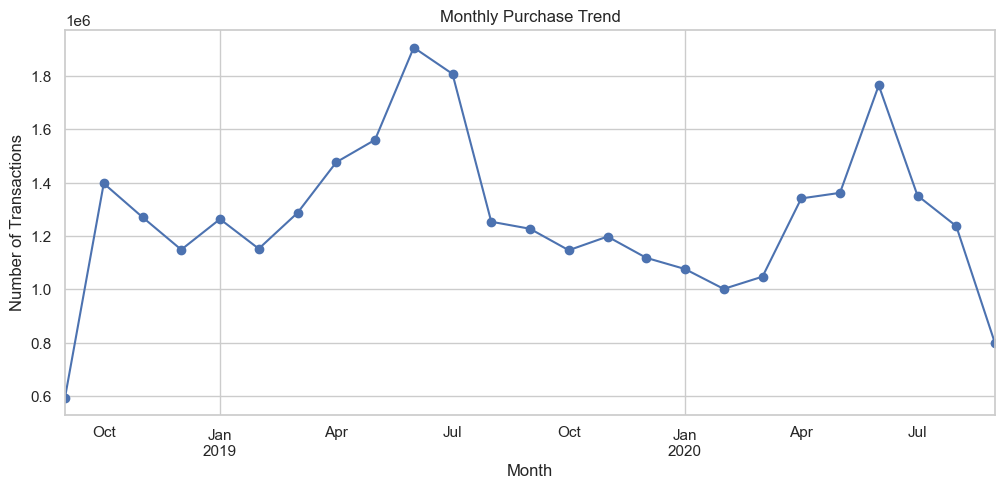

In [40]:
# Merge and plot
tx_articles = transactions_df.merge(articles_df, on='article_id')
tx_articles['month'] = tx_articles['t_dat'].dt.to_period('M')
tx_articles.groupby('month').size().plot(kind='line', marker='o', figsize=(12, 5))
plt.title("Monthly Purchase Trend")
plt.xlabel("Month")
plt.ylabel("Number of Transactions")
plt.grid(True)
plt.show()

### Loyal Customers

In [42]:
# Number of transactions per customer
loyal_customers = (
    transactions_df.groupby('customer_id')['article_id']
    .count()
    .reset_index(name='num_transactions')
    .sort_values(by='num_transactions', ascending=False)
)

# Top 10 most loyal customers
loyal_customers.head(10)


,customer_id,num_transactions
1011710,be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee9...,1895
962395,b4db5e5259234574edfff958e170fe3a5e13b6f146752c...,1441
391840,49beaacac0c7801c2ce2d189efe525fe80b5d37e46ed05...,1364
885174,a65f77281a528bf5c1e9f270141d601d116e1df33bf9df...,1361
1090960,cd04ec2726dd58a8c753e0d6423e57716fd9ebcf2f14ed...,1237
456062,55d15396193dfd45836af3a6269a079efea339e875eff4...,1208
1028179,c140410d72a41ee5e2e3ba3d7f5a860f337f1b5e41c27c...,1170
755132,8df45859ccd71ef1e48e2ee9d1c65d5728c31c46ae957d...,1169
20162,03d0011487606c37c1b1ed147fc72f285a50c05f00b971...,1157
578832,6cc121e5cc202d2bf344ffe795002bdbf87178054bcda2...,1143


In [43]:
# Total spend per customer
customer_spend = (
    transactions_df.groupby('customer_id')['price']
    .sum()
    .reset_index(name='total_spend')
    .sort_values(by='total_spend', ascending=False)
)

# Top 10 highest spenders
customer_spend.head(10)

,customer_id,total_spend
1011710,be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee9...,57.676407
885174,a65f77281a528bf5c1e9f270141d601d116e1df33bf9df...,50.921186
20162,03d0011487606c37c1b1ed147fc72f285a50c05f00b971...,49.967169
133564,191071b0e1f2e94a557f1a0b4cea3de55faf1581b1f464...,47.682017
962395,b4db5e5259234574edfff958e170fe3a5e13b6f146752c...,47.662000
578832,6cc121e5cc202d2bf344ffe795002bdbf87178054bcda2...,47.247797
1283457,f137c16fd175271922dad4006565503952f24750a57388...,41.688661
1242262,e97c3a6c680cd3569df10f901a61fdffaf8f70300f6adf...,41.482051
714142,863f0e03da282ae32a76775ce55d8a4605a85c84a26066...,41.414102
1090960,cd04ec2726dd58a8c753e0d6423e57716fd9ebcf2f14ed...,41.327051


In [44]:
loyalty_df = loyal_customers.merge(customer_spend, on='customer_id')
loyalty_df.head(10)

,customer_id,num_transactions,total_spend
0,be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee9...,1895,57.676407
1,b4db5e5259234574edfff958e170fe3a5e13b6f146752c...,1441,47.662000
2,49beaacac0c7801c2ce2d189efe525fe80b5d37e46ed05...,1364,30.126814
3,a65f77281a528bf5c1e9f270141d601d116e1df33bf9df...,1361,50.921186
4,cd04ec2726dd58a8c753e0d6423e57716fd9ebcf2f14ed...,1237,41.327051
5,55d15396193dfd45836af3a6269a079efea339e875eff4...,1208,38.234102
6,c140410d72a41ee5e2e3ba3d7f5a860f337f1b5e41c27c...,1170,34.510153
7,8df45859ccd71ef1e48e2ee9d1c65d5728c31c46ae957d...,1169,39.759712
8,03d0011487606c37c1b1ed147fc72f285a50c05f00b971...,1157,49.967169
9,6cc121e5cc202d2bf344ffe795002bdbf87178054bcda2...,1143,47.247797


C:\Users\sandeep.palit\AppData\Local\Temp\ipykernel_25704\2723501067.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='customer_id', y='num_transactions', data=top_loyal, palette='Blues_d')
C:\Users\sandeep.palit\AppData\Local\Temp\ipykernel_25704\2723501067.py:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


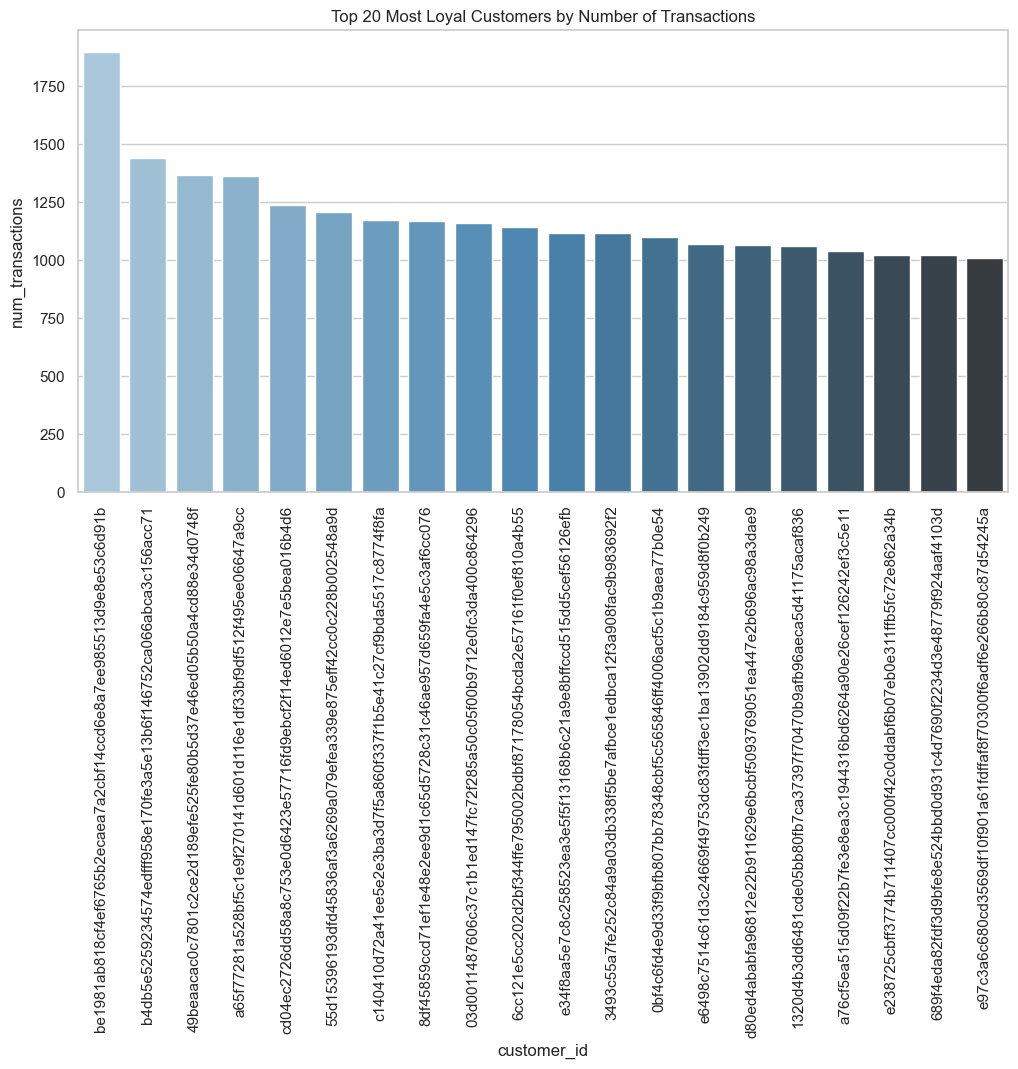

In [ ]:
top_loyal = loyalty_df.head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x='customer_id', y='num_transactions', data=top_loyal, palette='Blues_d')
plt.xticks(rotation=90)
plt.title('Top 20 Most Loyal Customers by Number of Transactions')
plt.tight_layout()
plt.show()

### Demography Analysis

### 1. Top Regions by Number of Customers

In [49]:
# Top 10 postal codes with the most customers
top_postal_customers = customers_df['postal_code'].value_counts().head(10).reset_index()
top_postal_customers.columns = ['postal_code', 'num_customers']
top_postal_customers

,postal_code,num_customers
0,2c29ae653a9282cce4151bd87643c907644e09541abc28...,120303
1,cc4ed85e30f4977dae47662ddc468cd2eec11472de6fac...,261
2,714976379549eb90aae4a71bca6c7402cc646ae7c40f6c...,159
3,7c1fa3b0ec1d37ce2c3f34f63bd792f3b4494f324b6be5...,157
4,5b7eb31eabebd3277de632b82267286d847fd5d44287ee...,156
5,1f5bd429acc88fbbf24de844a59e438704aa8761bc7b99...,154
6,9d5787501bf1c77592156ba51eab13f4a2670c80768643...,141
7,a1959a16bf167858c93a66ec2a330644512b25fb10f97e...,138
8,087a46b65170845b4a55226ff1eb748ce7843d4b637cbe...,134
9,4d22901a97bd952bb92cdd31b38c39b41dd3250a735cab...,132


### 2: Top Regions by Number of Transactions

In [52]:
# Join transactions with customers to get postal_code
tx_postal = transactions_df.merge(customers_df[['customer_id', 'postal_code']], on='customer_id', how='left')

# Aggregate transactions by postal_code
postal_txn = tx_postal['postal_code'].value_counts().head(10).reset_index()
postal_txn.columns = ['postal_code', 'num_transactions']
postal_txn


,postal_code,num_transactions
0,2c29ae653a9282cce4151bd87643c907644e09541abc28...,625893
1,a5ca21aefc3cf90afd9b09faf3b0f8f3c423d4f1cfb4c2...,5840
2,1f5bd429acc88fbbf24de844a59e438704aa8761bc7b99...,5462
3,7c1fa3b0ec1d37ce2c3f34f63bd792f3b4494f324b6be5...,5444
4,5b7eb31eabebd3277de632b82267286d847fd5d44287ee...,5332
5,2790324c84cdb8ba471be2a199cfb5103bbe1ab10883a0...,4360
6,a1959a16bf167858c93a66ec2a330644512b25fb10f97e...,4257
7,9d5787501bf1c77592156ba51eab13f4a2670c80768643...,4202
8,cc4ed85e30f4977dae47662ddc468cd2eec11472de6fac...,3585
9,3eb41c8511d4e04fc0f02452e6e15d206d0c0e9d0f25ff...,3530
